In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-03,20.222000,20.306667,19.438000,19.653334,19.653334,119925000
1,2018-10-04,19.596666,19.600000,18.511333,18.788668,18.788668,147213000
2,2018-10-05,18.309999,18.325333,17.333332,17.463333,17.463333,269167500
3,2018-10-08,17.634666,17.850668,16.600000,16.704000,16.704000,202090500
4,2018-10-09,17.016666,17.784666,16.886667,17.520000,17.520000,180909000
...,...,...,...,...,...,...,...
1252,2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600
1253,2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200
1254,2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900
1255,2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001,128346200


In [3]:
(df['High'] - df['Low']).mean()

7.628328686555291

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# Get the current date
current_date = pd.to_datetime('today')

# Calculate one year ago from today
one_year_ago = current_date - pd.DateOffset(years=1)

# Filter the DataFrame
df_one_year = df[df['Date'] >= one_year_ago]

df_one_year

,Date,Open,High,Low,Close,Adj Close,Volume
1008,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700
1009,2022-10-06,239.440002,244.580002,235.350006,238.130005,238.130005,69298400
1010,2022-10-07,233.940002,234.570007,222.020004,223.070007,223.070007,83916800
1011,2022-10-10,223.929993,226.990005,218.360001,222.960007,222.960007,67925000
1012,2022-10-11,220.949997,225.750000,215.000000,216.500000,216.500000,77013200
...,...,...,...,...,...,...,...
1252,2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600
1253,2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200
1254,2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900
1255,2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001,128346200


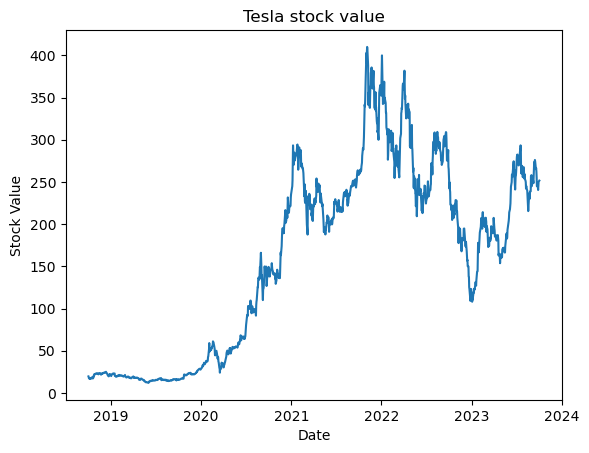

In [5]:
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.title('Tesla stock value')
plt.show()

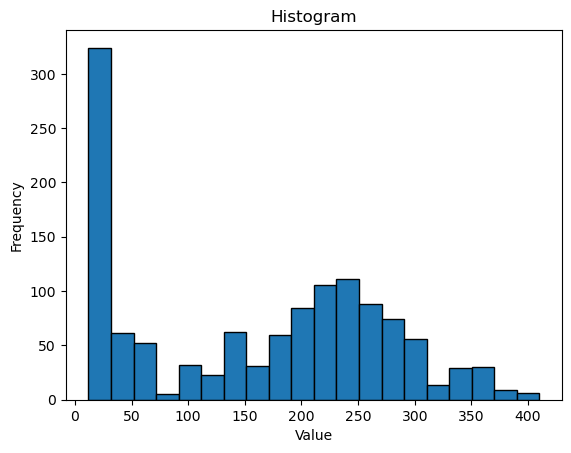

In [6]:
plt.hist(df['Close'], bins=20, edgecolor='black')  # 'data' is your list of values, 'bins' determines the number of bins
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

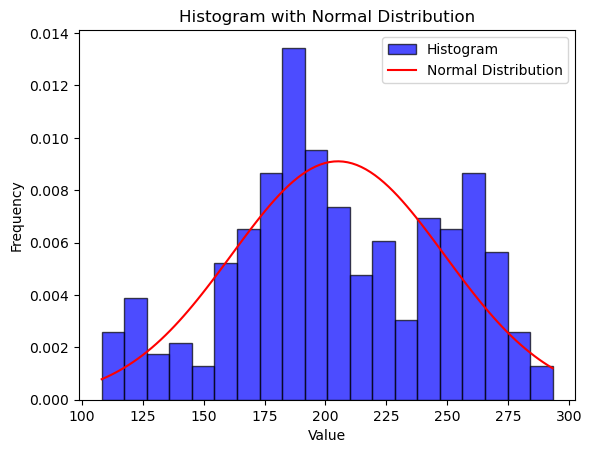

In [8]:
# histograma sobreposto com a distribuição normal para valores até há um ano atrás
mean = np.mean(df_one_year['Close'])
std_dev = np.std(df_one_year['Close'])

# Generate x values
x = np.linspace(min(df_one_year['Close']), max(df_one_year['Close']), 100)

# Generate y values for the normal distribution
y = stats.norm.pdf(x, mean, std_dev)

# Create the histogram
plt.hist(df_one_year['Close'], bins=20, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

# Plot the normal distribution
plt.plot(x, y, color='red', label='Normal Distribution')

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution')

# Show the plot
plt.show()

In [80]:
X = np.arange(len(df)).reshape(-1, 1)
Y = df['Close']
dates = pd.to_datetime(df['Date'])

degree=5
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)

start_date = dates.min()
end_date = dates.max()
new_dates = [start_date + timedelta(days=i) for i in range(len(df) + 100)]  # Adjust the range as needed
X_test = np.arange(len(new_dates)).reshape(-1, 1)

# Transform the X_test values for prediction
X_test_poly = poly.transform(X_test)

# Predict using the model
y_poly_pred = poly_model.predict(X_test_poly)

# TODO simplify date calculations (remove timedelta)



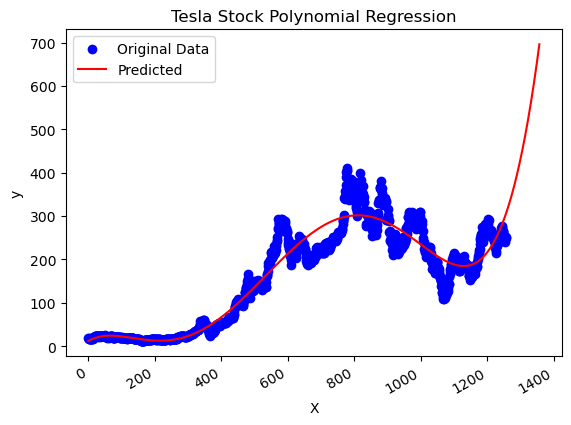

In [82]:
plt.scatter(X,Y, label='Original Data', color='blue')
plt.plot(X_test, y_poly_pred, label='Predicted', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().autofmt_xdate()
plt.title('Tesla Stock Polynomial Regression')
plt.show()